<a href="https://colab.research.google.com/github/sheka00/data_analysis_in_python/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_EDA_%D0%B8_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Импорт всех необходимых библиотек**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
pd.set_option("display.precision", 4)
pd.set_option("plotting.backend", "matplotlib")

**Словесное описание признаков**
- id: номер транзакции
- timestamp: дата продажи (транзакции)
- full_sq: общая площадь
- life_sq: жилая площадь 
- floor: этаж
- max_floor: количество этажей в здании
- material: материал, из которого изговолены стены 
- build_year: год строительства
- num_room: количество жилых комнат 
- kitch_sq: площадь кухни 
- full_all: количество населения в регионе 
- state: жилищные условия 
- sub_area: название территории 
- price_doc: цена квартиры(целевая переменная)


**Загрузка данных**

In [6]:
df = pd.read_csv("/content/train.csv")
df["timestamp_month"] = df["timestamp"].apply(lambda row: row.split("-")[1])#Добавление столбца - дата продажи (месяц)
df["floor"] = df["floor"].apply(lambda row: str(row))#Сделаем номер этажа категориальным
df["state"] = df["state"].apply(lambda row: str(row))#Сделаем жилищные условия категориальными
df["max_floor"] = df["max_floor"].apply(lambda row: str(row))#Сделаем максимальный этаж категориальным
df["material"] = df["material"].apply(lambda row: str(row))#Сделаем материал стен категориальным
df["num_room"] = df["num_room"].apply(lambda row: str(row))#Сделаем количество жилых комнат категориальным


**Первичный анализ датасета**

In [7]:
df.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,timestamp_month
0,13324,2013-12-23,42,28.0,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,Pechatniki,7100000,12
1,10064,2013-08-26,55,41.0,4.0,3.0,5.0,2.0,1960.0,3.0,5.0,21040,Dorogomilovo,11500000,08
2,12022,2013-11-11,43,29.0,4.0,2.0,5.0,2.0,1960.0,2.0,5.0,157010,Ivanovskoe,5800000,11
3,10186,2013-08-30,62,35.0,15.0,nan,22.0,1.0,1985.0,2.0,10.0,178264,Jasenevo,11400000,08
4,30052,2015-05-29,80,55.0,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154,05


In [8]:
df.tail()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,timestamp_month
15087,23382,2014-10-08,69,48.0,2.0,2.0,4.0,2.0,1950.0,3.0,7.0,101982,Tekstil'shhiki,9100000,10
15088,24264,2014-10-31,78,75.0,4.0,1.0,17.0,1.0,2014.0,3.0,1.0,247469,Nekrasovka,7722400,10
15089,16165,2014-03-18,38,19.0,15.0,3.0,17.0,1.0,1990.0,1.0,8.0,101708,Juzhnoportovoe,7000000,03
15090,10635,2013-09-20,54,32.0,11.0,3.0,16.0,1.0,1979.0,2.0,9.0,178264,Jasenevo,7000000,09
15091,29081,2015-04-13,154,108.0,14.0,3.0,18.0,4.0,2006.0,4.0,5.0,80791,Horoshevskoe,50000000,04


In [9]:
df.sample()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,timestamp_month
12722,16144,2014-03-18,54,32.0,12.0,nan,16.0,1.0,1977.0,2.0,9.0,178264,Jasenevo,9990000,03


In [10]:
df.shape

(15092, 15)

**Разбор каждой переменной самой по себе**

In [11]:
df.describe()

,id,full_sq,life_sq,kitch_sq,full_all,price_doc
count,15092.0000,15092.000,13828.0000,13938.0000,1.5092e+04,1.5092e+04
mean,18772.4277,53.967,33.7849,7.2806,1.5923e+05,7.5647e+06
std,7102.9068,48.082,19.7944,30.0719,3.0380e+05,4.9852e+06
min,15.0000,0.000,0.0000,0.0000,2.5460e+03,3.3146e+05
25%,13464.7500,38.000,20.0000,5.0000,4.8439e+04,5.1000e+06
50%,19005.5000,49.000,30.0000,7.0000,8.7713e+04,6.6500e+06
75%,24746.2500,63.000,43.0000,9.0000,1.2535e+05,8.9000e+06
max,30473.0000,5326.000,637.0000,2014.0000,1.7167e+06,9.5122e+07


* Номер транзакции - этот столбец мало информативен
* Информация об общей площади подкреплена выборкой от 0 до 5326 кв.м. Средний показатель равен 53.967	 кв.м, примерно 68% записей лежит в диапазоне 5.885 - 102.049 кв.м
* Информация о жилой площади в диапазоне от 0 до 637 кв.м. Средний показатель равен 33.7849 кв.м, примерно 68% записей лежит в диапазоне 13.9905 - 53.5793 кв.м
* Площадь кухни находится в диапазоне 0 - 2014 кв.м., средняя площадь 7.2806 кв.м.
* Количества населения в регионах находится в диапазоне 2546 - 1716700, средний показатель 159230
* Цена квартиры находится в диапазоне 331460 - 95122000, средняя цена 7564700, примерно 68% записей лежит в диапазоне 2579500 - 12549900


In [12]:
df.describe(include=(object))

,timestamp,floor,state,max_floor,material,build_year,num_room,sub_area,timestamp_month
count,15092,15092,15092,15092,15092,13475,15092,15092,15092
unique,1031,40,6,46,7,116,13,146,12
top,2014-12-16,3.0,2.0,17.0,1.0,2014.0,2.0,Poselenie Sosenskoe,12
freq,99,1588,4671,2539,9012,733,5445,502,1831


* Квартиры были проданы в 1031 уникальных дня, из которых в дату 2014-12-16	наибольшее - 99 кв
* Всего 40 уникальных этажей, самый наиболее продаваемый 3 - 1588 сделок 
* Уникальных оценок жилищных условий всего 6, наиболее продаваемая это 2 - 4671 продаж
* Наиболее встречающийся максимальный 17 этаж здания(2539 сделок) из 46 уникальных
* Самый продаваемый материал стен это 1 (9012 сделок) из 7 видов существующих
* 733 продажи были сделаны по квартирам, строившимися в 2014 году, уникальных всего 116 годов
* Наиболее покупаемые двухкомнатные квартиры (5445 продаж), встречаются 13 уникальных количеств комнат
* Продажи были сделаны на 146 различных территориях, наиболее продаваемые квартиры находятся в Poselenie Sosenskoe(502 проданных кв)
* Больше квартир продано было зимой (1831 продажа)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15092 non-null  int64  
 1   timestamp        15092 non-null  object 
 2   full_sq          15092 non-null  int64  
 3   life_sq          13828 non-null  float64
 4   floor            15092 non-null  object 
 5   state            15092 non-null  object 
 6   max_floor        15092 non-null  object 
 7   material         15092 non-null  object 
 8   build_year       13475 non-null  object 
 9   num_room         15092 non-null  object 
 10  kitch_sq         13938 non-null  float64
 11  full_all         15092 non-null  int64  
 12  sub_area         15092 non-null  object 
 13  price_doc        15092 non-null  int64  
 14  timestamp_month  15092 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 1.7+ MB


Пропуски данных есть, а именно:
- life_sq - 1264
- build_year - 1617
- kitch_sq - 1154

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


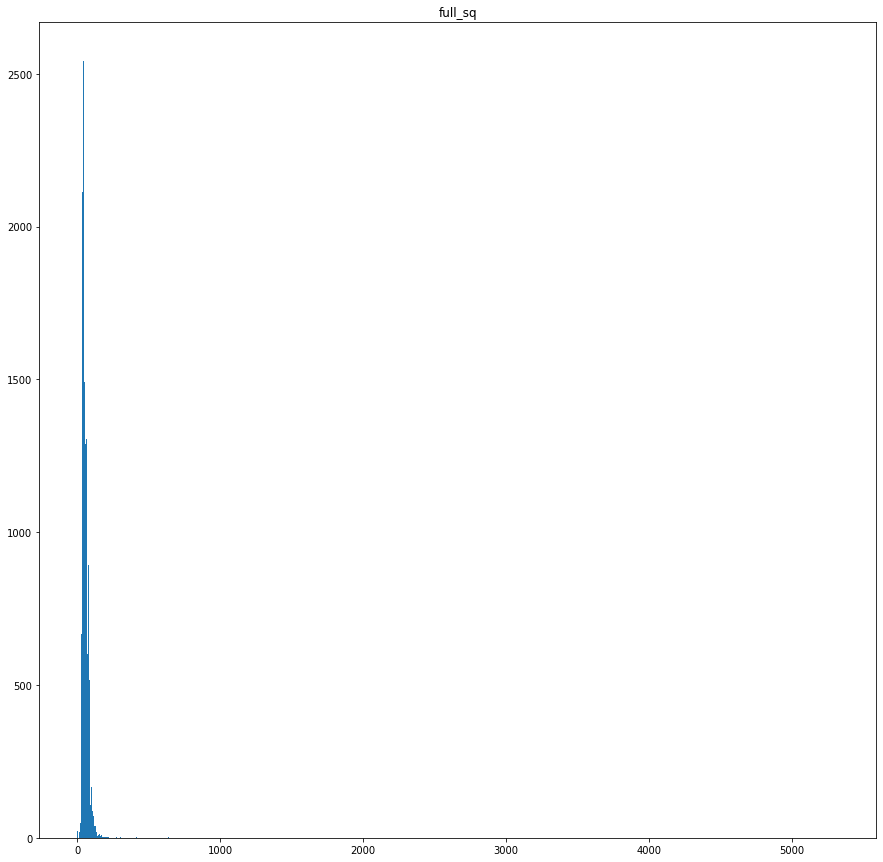

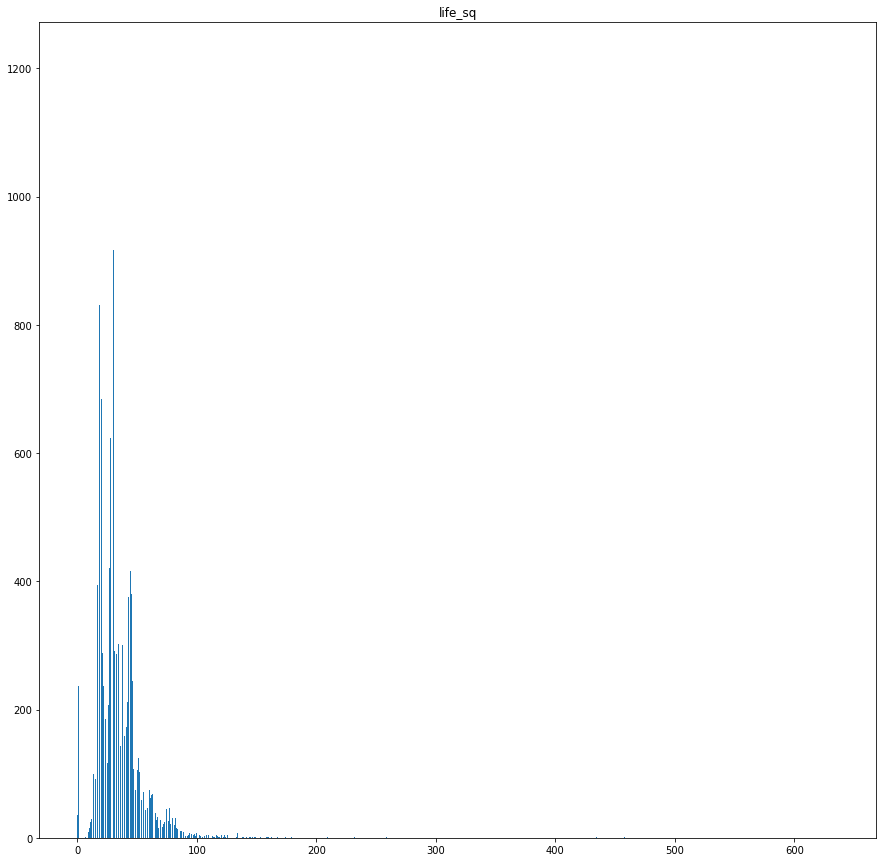

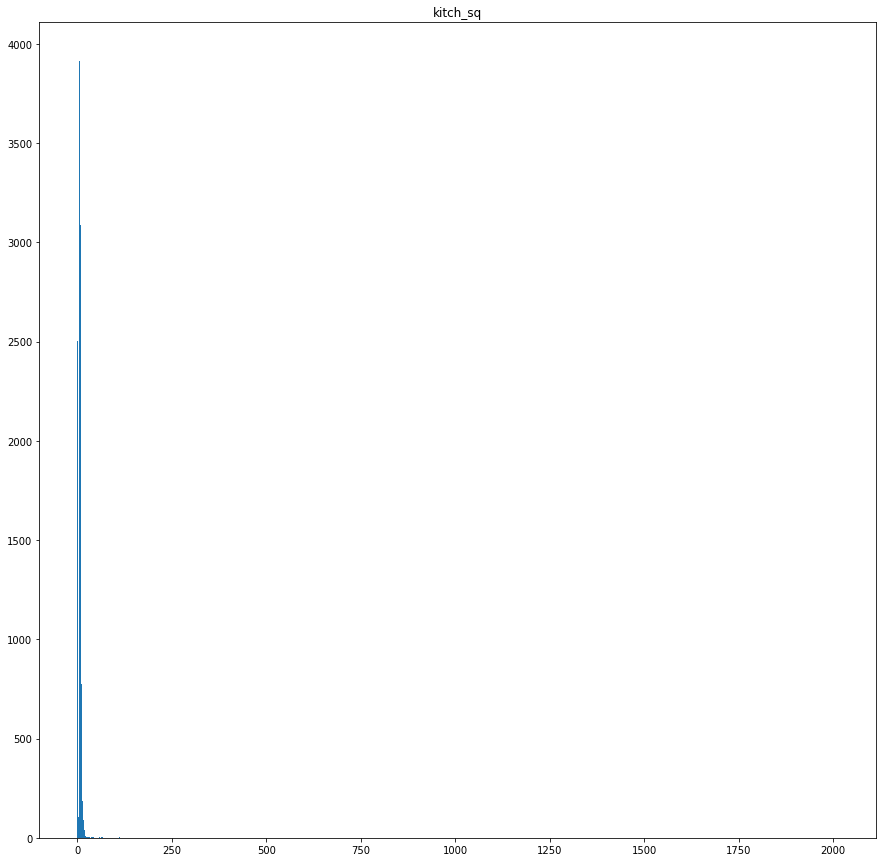

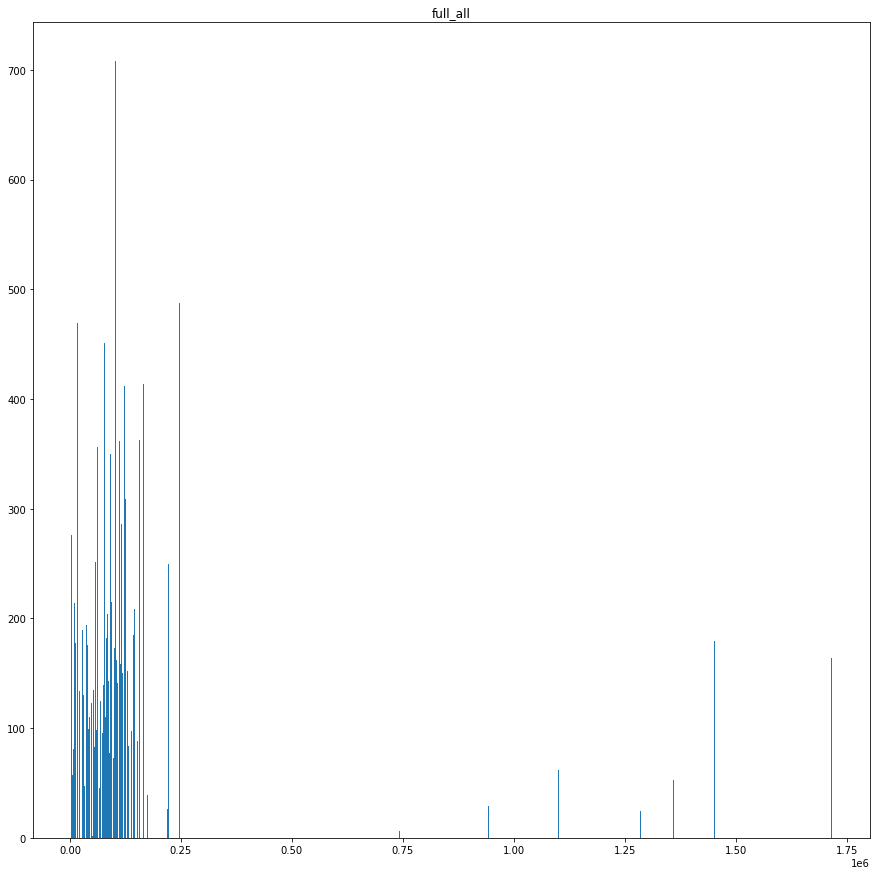

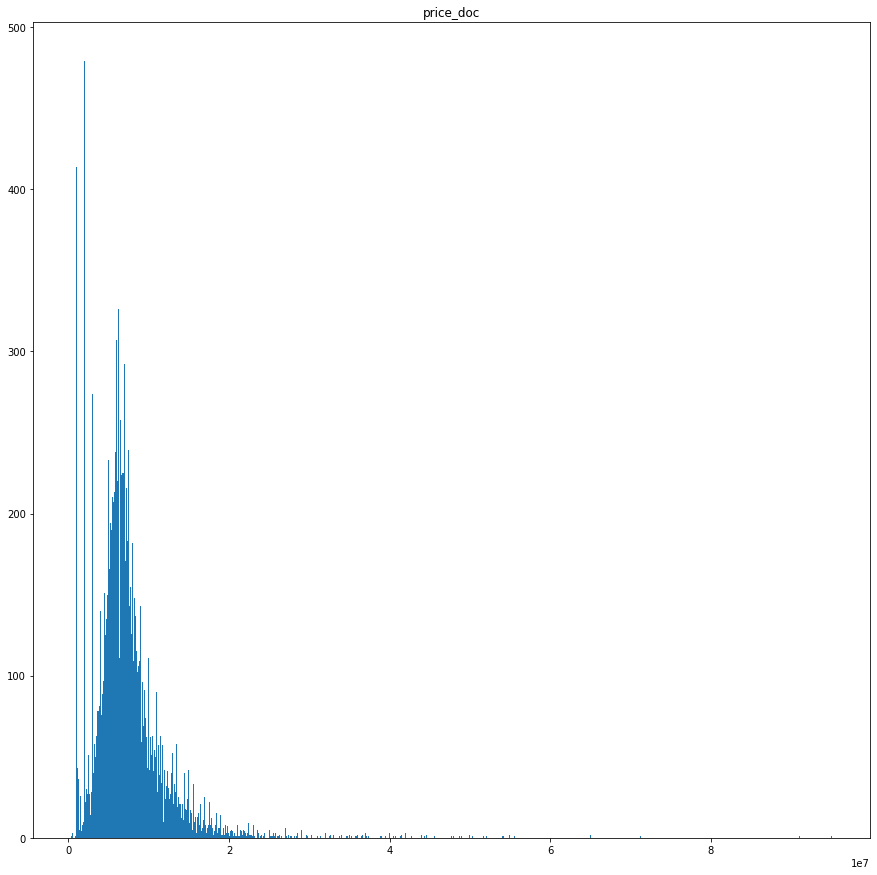

In [14]:
# графики количестенных признаков
for column in df.columns[1:]:
  dt = df[column].dtype
  if (dt != np.object):
    plt.figure(figsize=(15, 15))
    plt.hist(df[column].dropna(), bins = 1000)
    plt.title(f'{column}')
    plt.show()

id
timestamp
full_sq
life_sq
floor


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


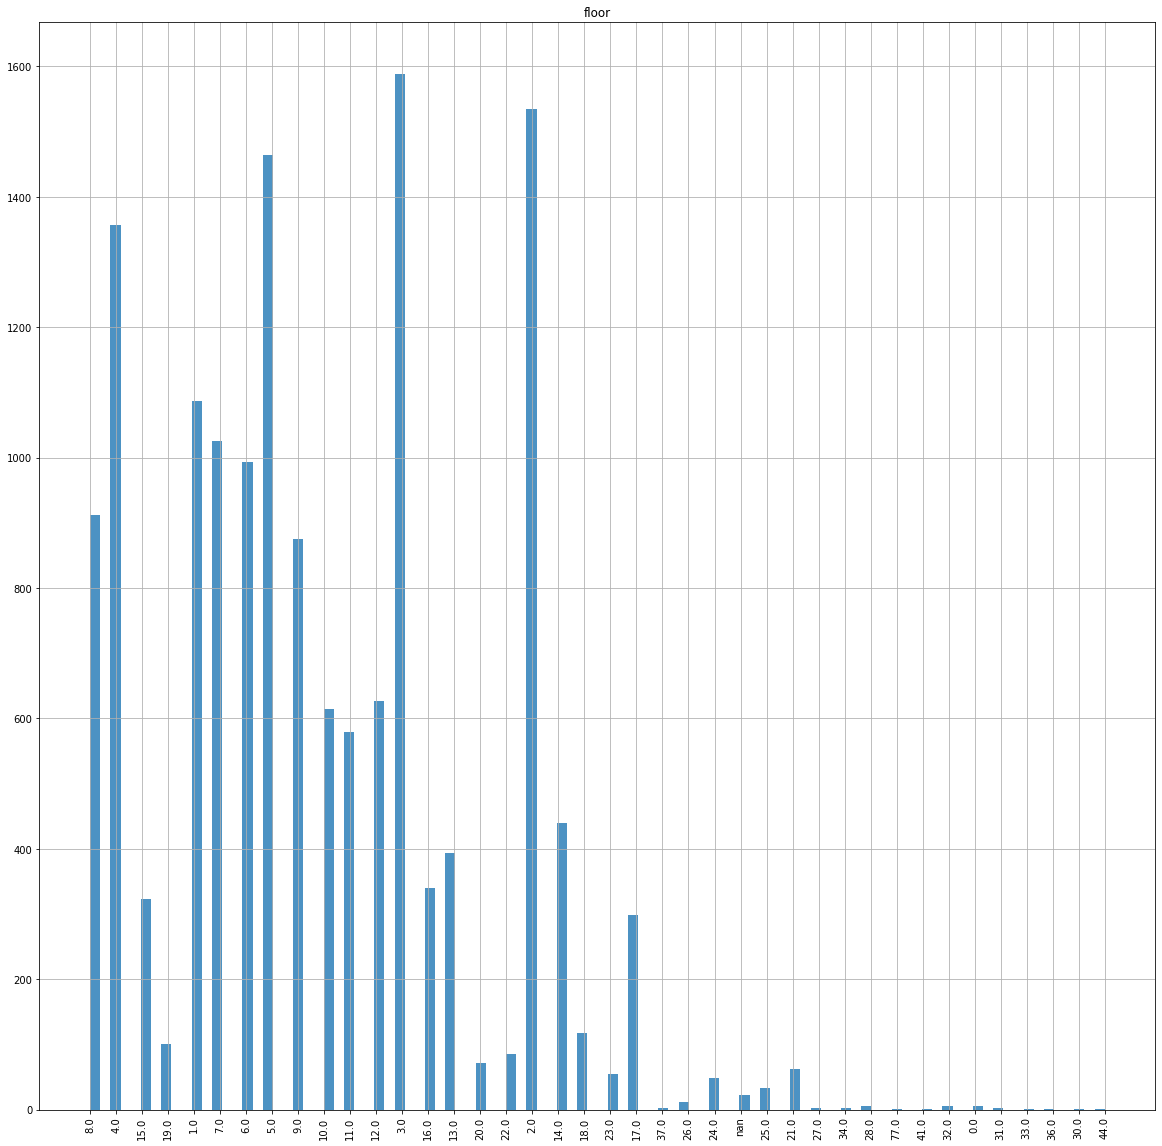

state


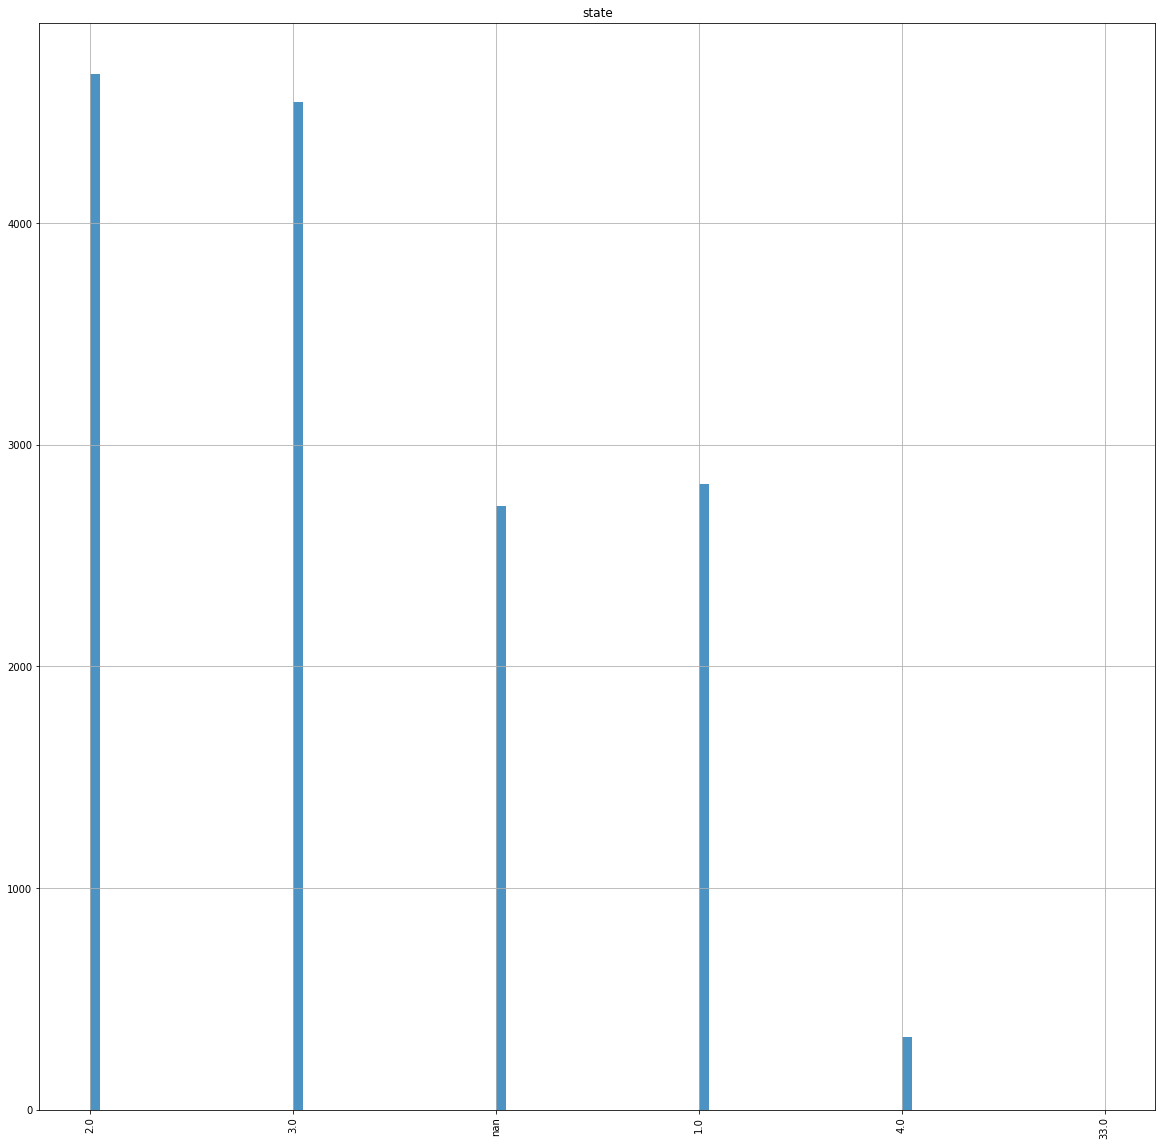

max_floor


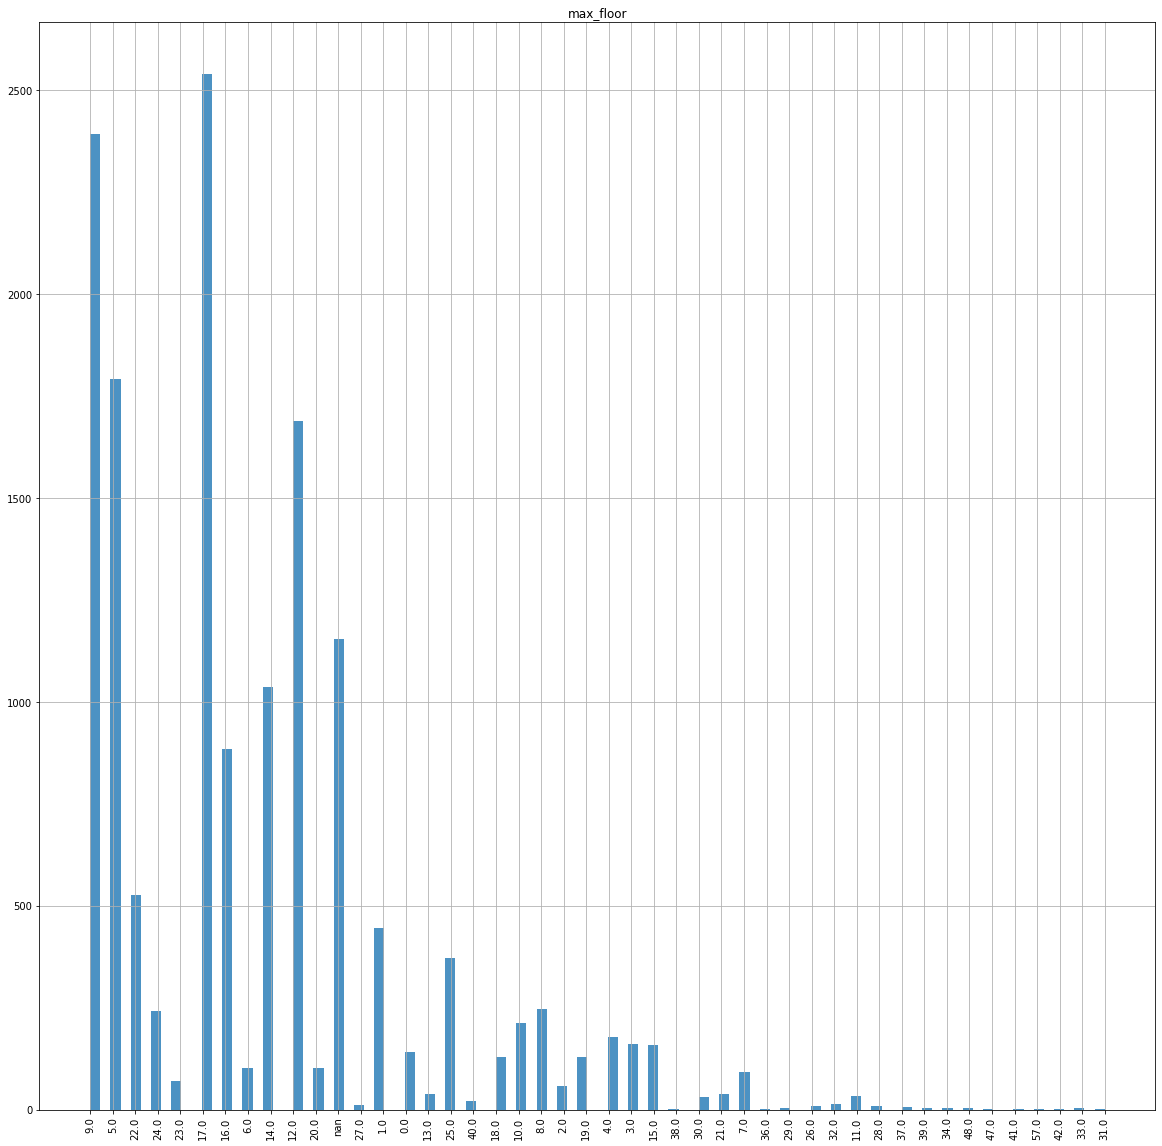

material


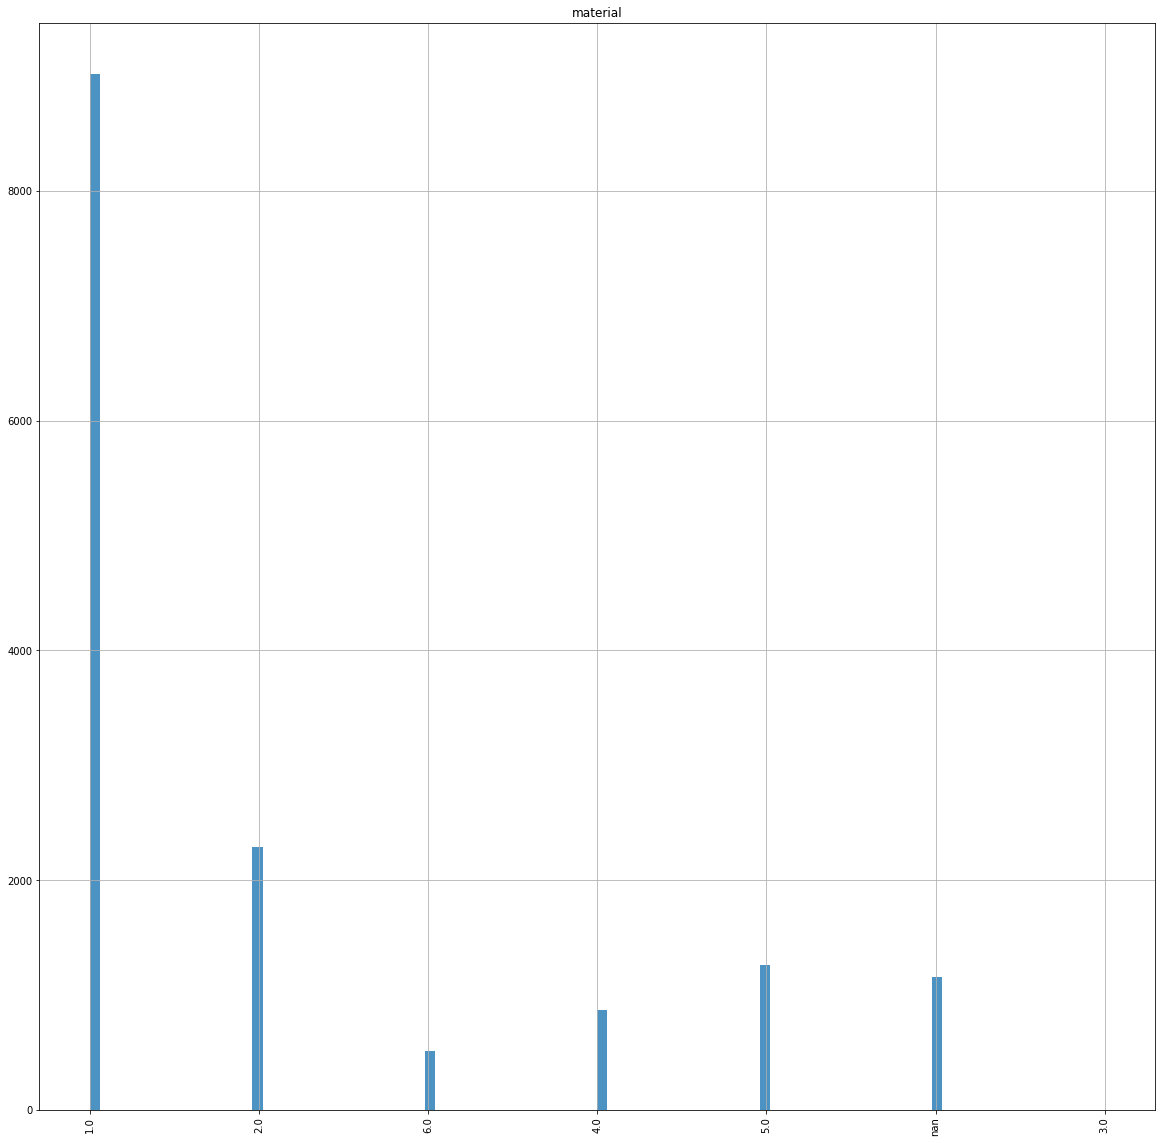

build_year


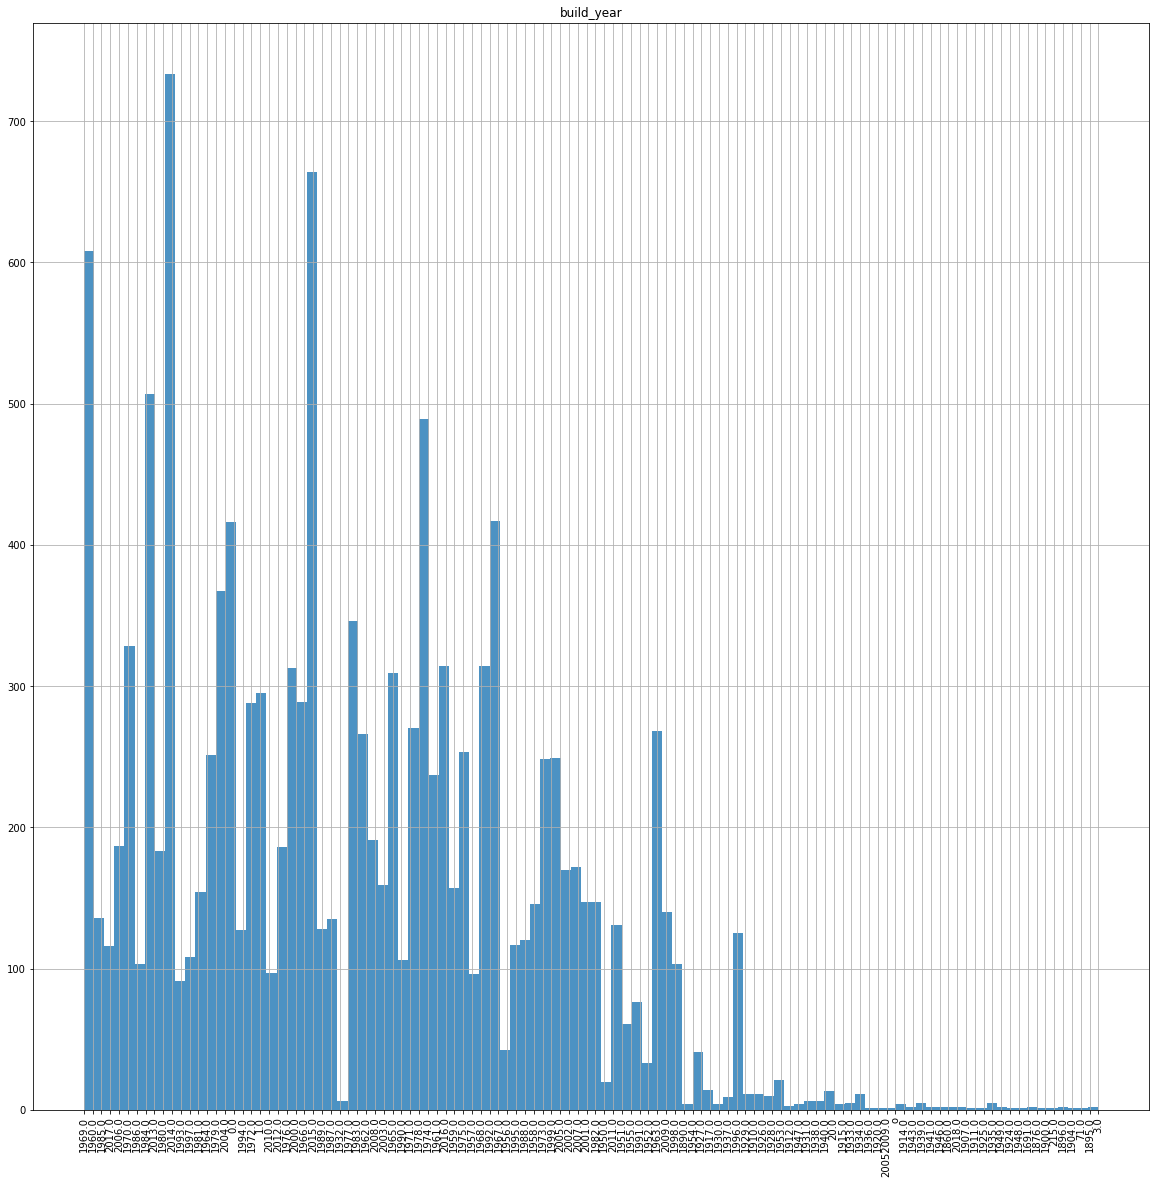

num_room


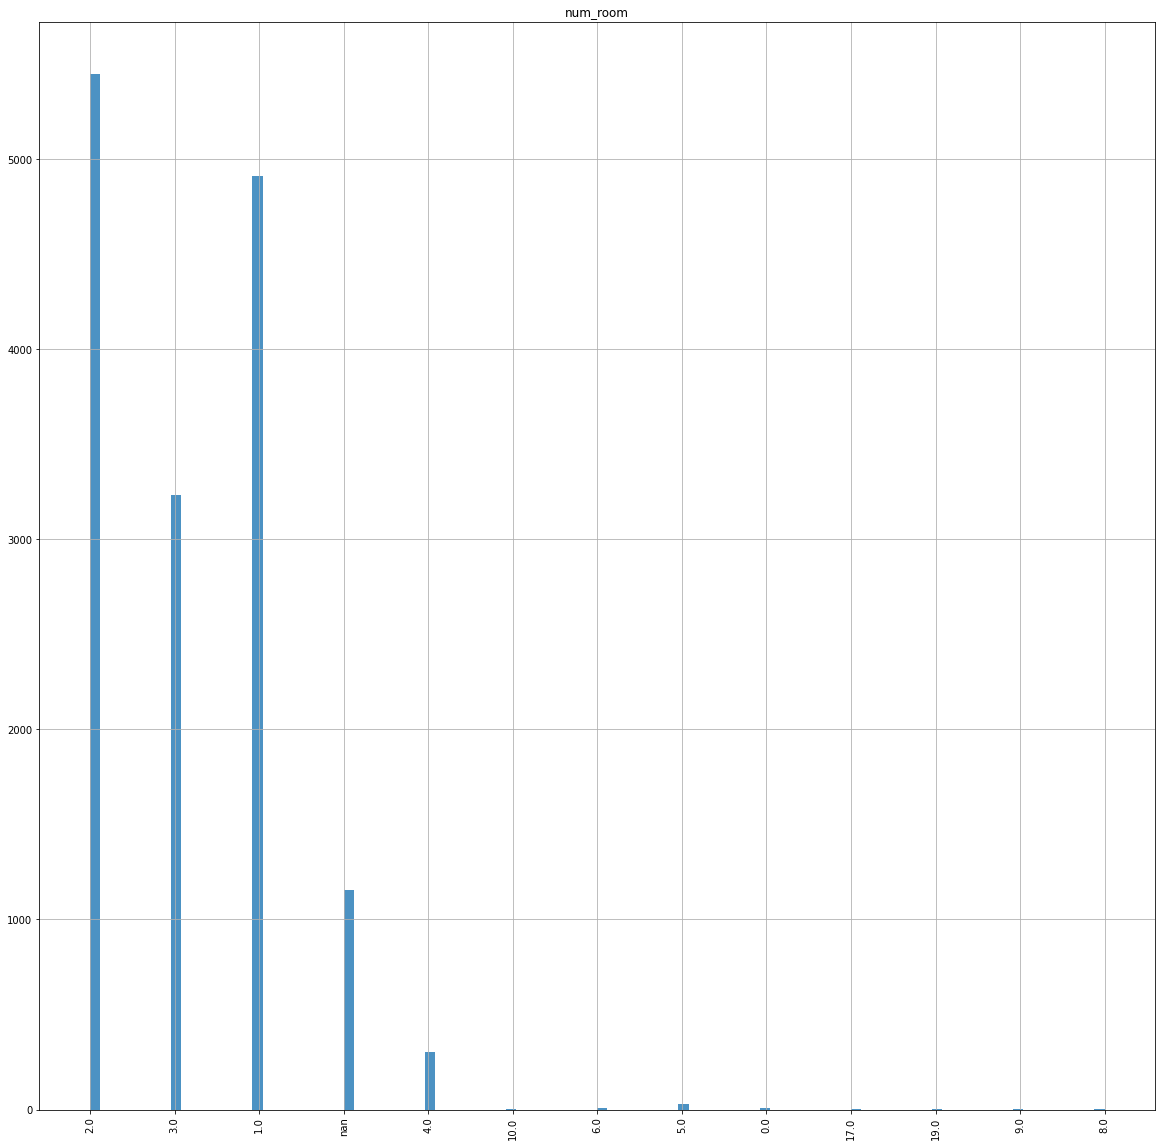

kitch_sq
full_all
sub_area


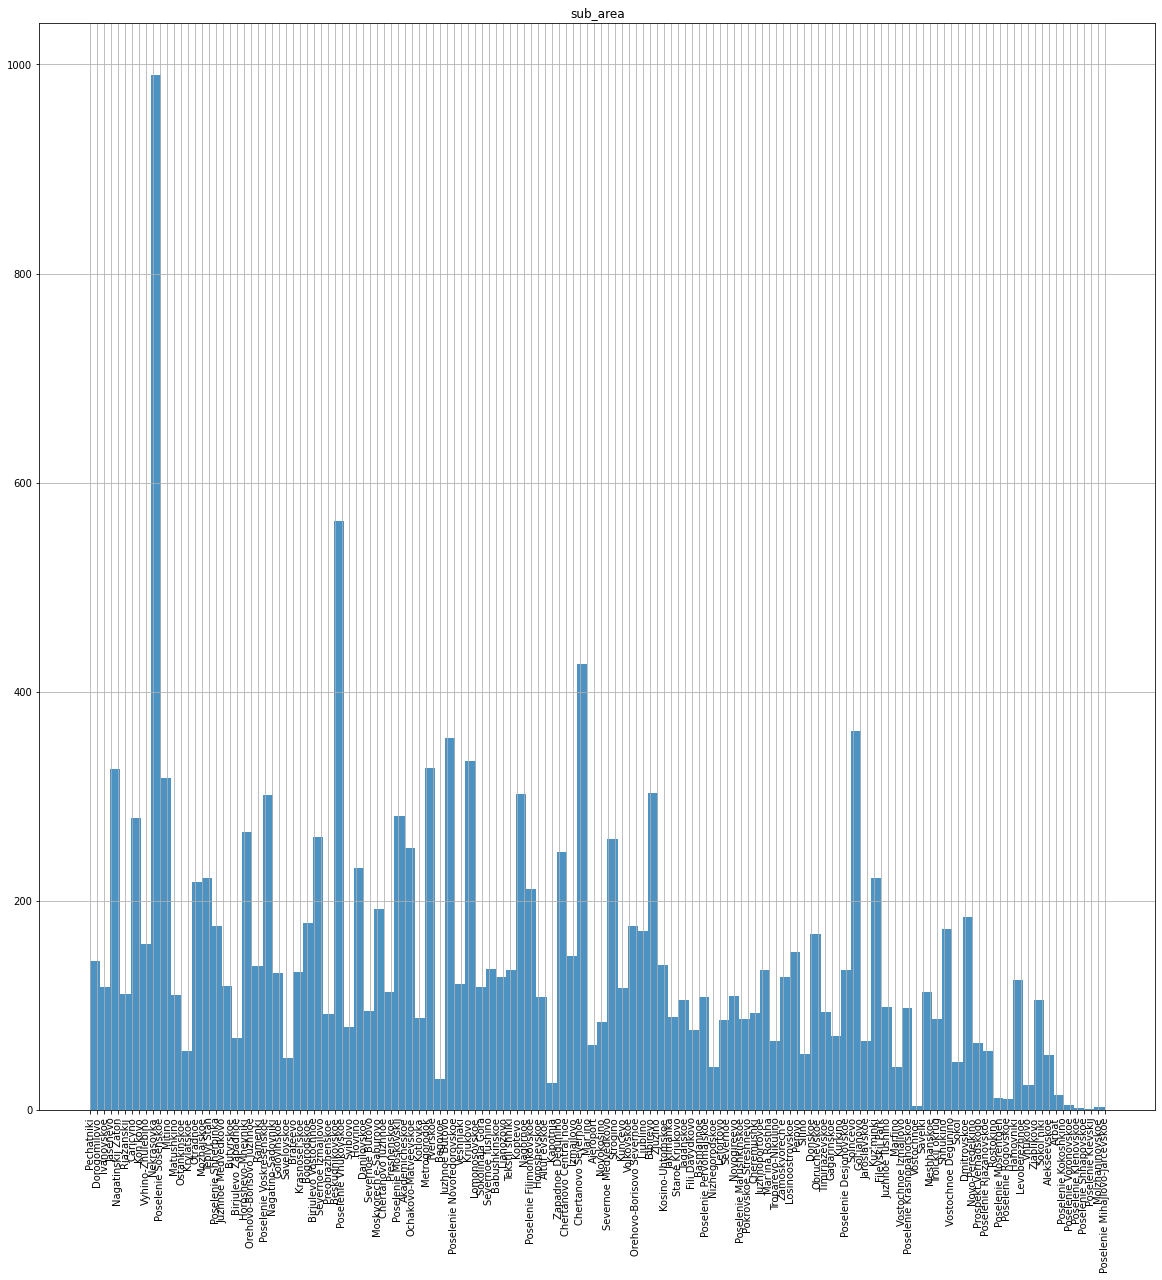

price_doc
timestamp_month


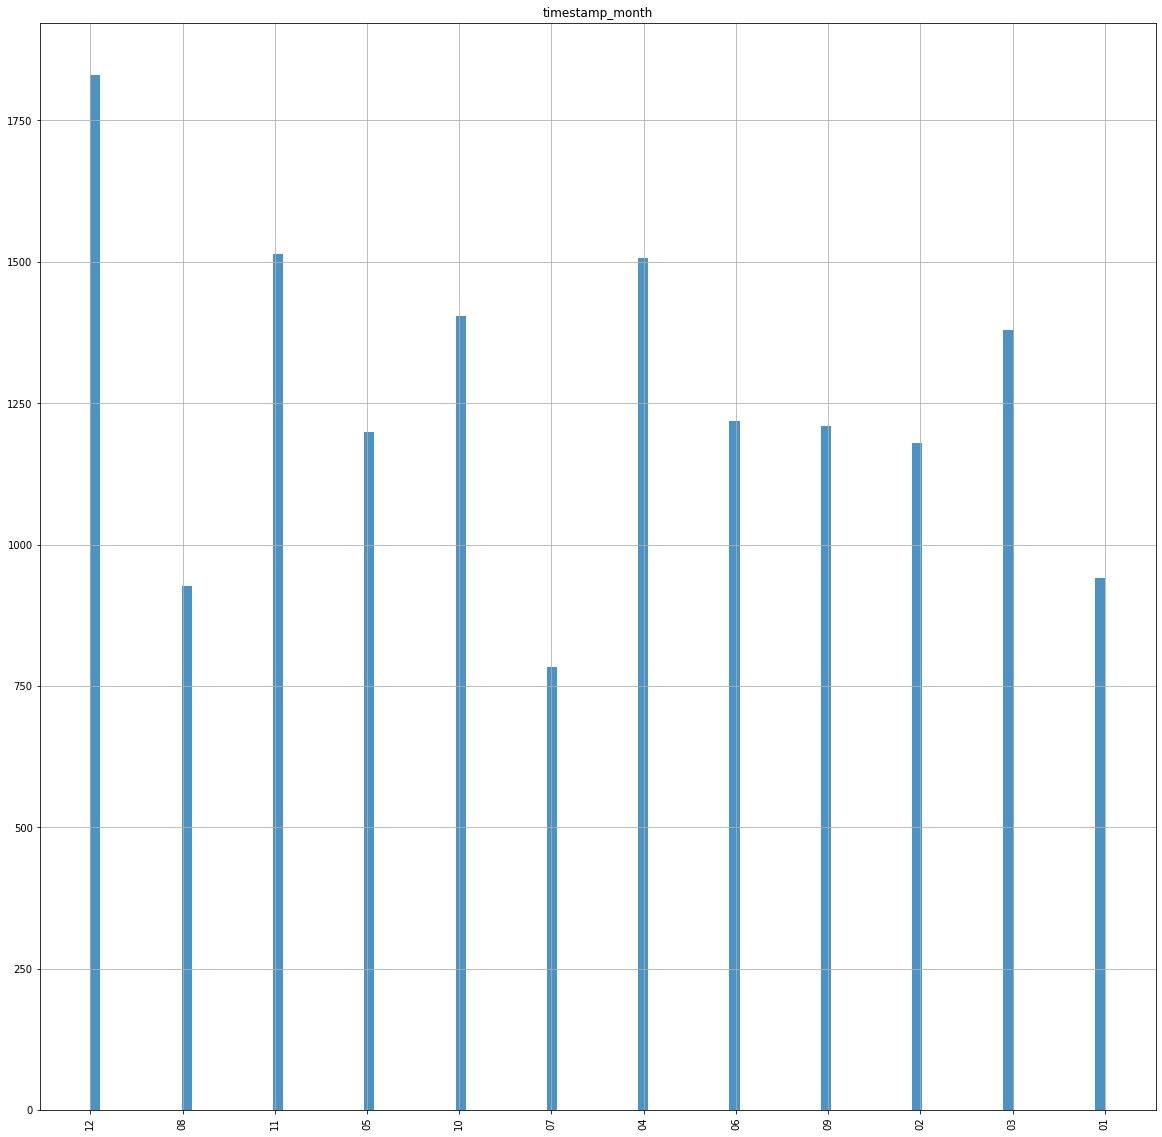

In [15]:
# графики категориальных признаков
for column in df.columns:
  print(column)
  dt = df[column].dtype
  if (dt == np.object and column!= "timestamp"):
    plt.title(f'{column}')
    df[f'{column}'].hist(bins=100, alpha=0.8, xrot = 90, figsize=(20, 20) )
    plt.show()

**Разбор переменной в разрезе ее группировки по другим признакам, которые являются категориальными**

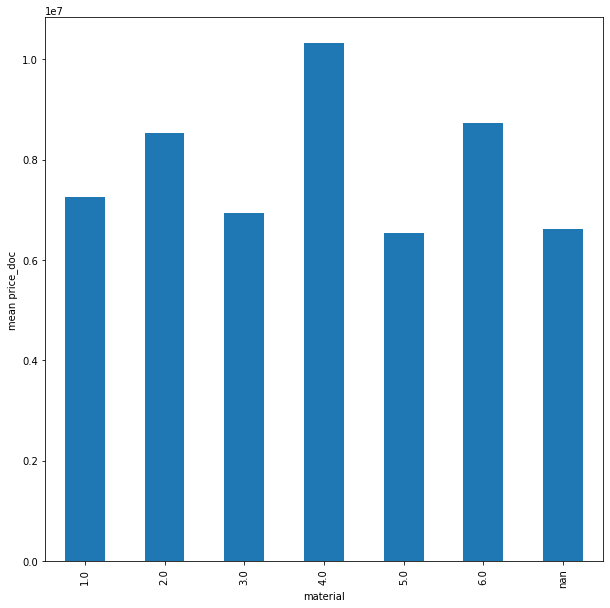

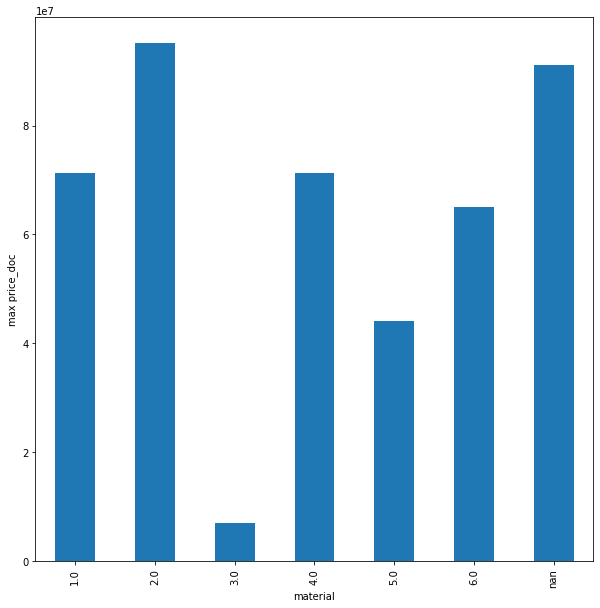

In [16]:
ax = plt.gca()
df.groupby(["material"]).agg([np.mean, np.std, np.min, np.max])["price_doc"]["mean"].plot.bar(figsize=(10,10))
ax.set_ylabel('mean price_doc')
plt.show()

ax = plt.gca()
df.groupby(["material"]).agg([np.mean, np.std, np.min, np.max])["price_doc"]["amax"].plot.bar(figsize=(10,10))
ax.set_ylabel('max price_doc')
plt.show()

* Средняя стоимость квартир со стенами 4 материала выше всех
* Максимальная стоимость квартир со стенами 2 материала выше всех, а самый низкий 3

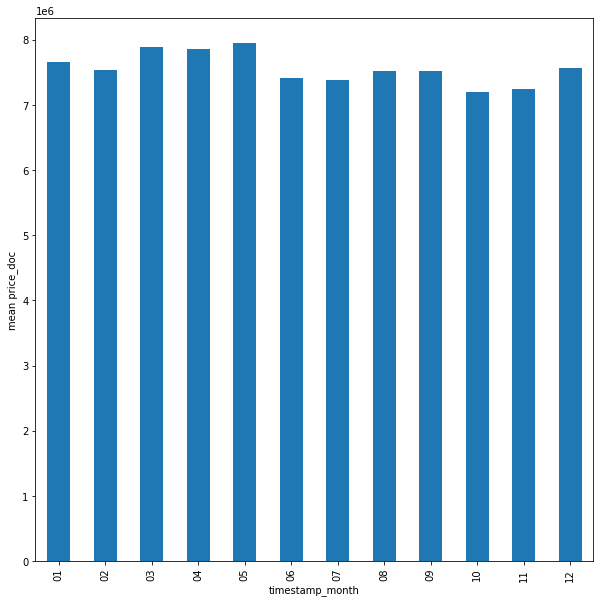

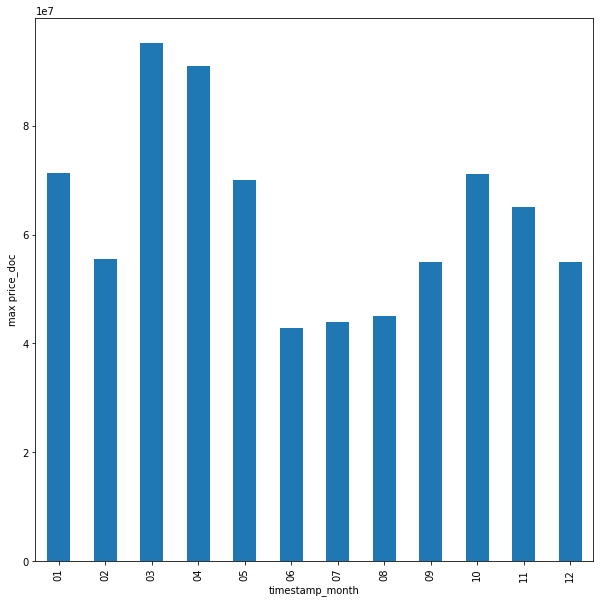

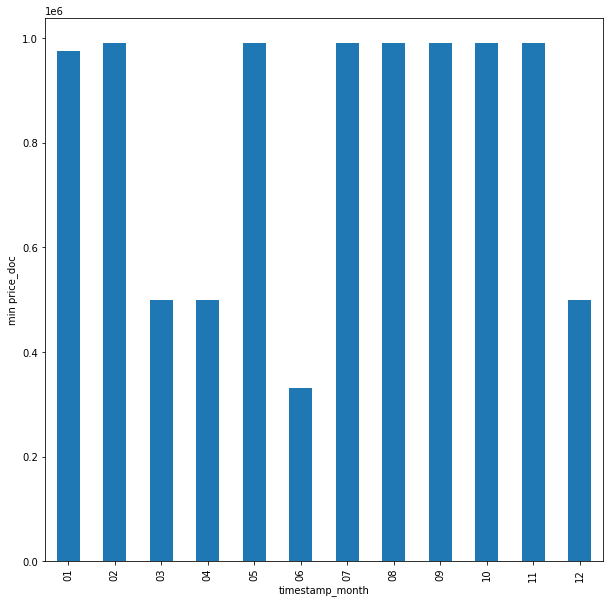

In [17]:
ax = plt.gca()
df.groupby(["timestamp_month"]).agg([np.mean, np.std, np.min, np.max])["price_doc"]["mean"].plot.bar(figsize=(10,10))
ax.set_ylabel('mean price_doc')
plt.show()

ax = plt.gca()
df.groupby(["timestamp_month"]).agg([np.mean, np.std, np.min, np.max])["price_doc"]["amax"].plot.bar(figsize=(10,10))
ax.set_ylabel('max price_doc')
plt.show()

ax = plt.gca()
df.groupby(["timestamp_month"]).agg([np.mean, np.std, np.min, np.max])["price_doc"]["amin"].plot.bar(figsize=(10,10))
ax.set_ylabel('min price_doc')
plt.show()

* Средняя стоимость квартир по месяцам примерно равномерная
* Максимальная стоимость квартир в марте выше всех
* Минимальная стоимость квартир в июне ниже всех

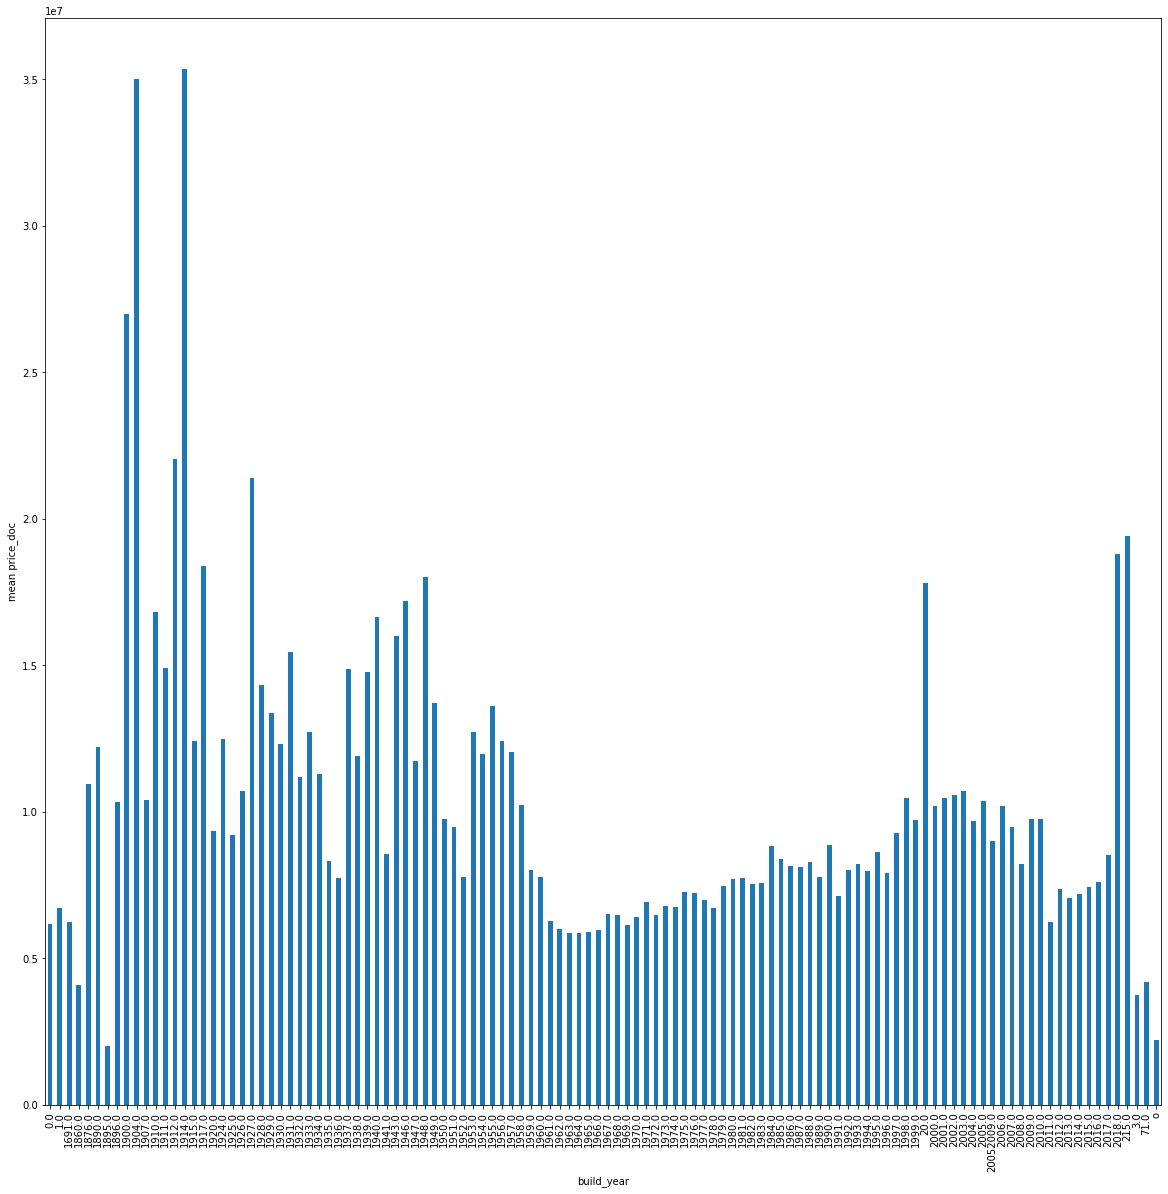

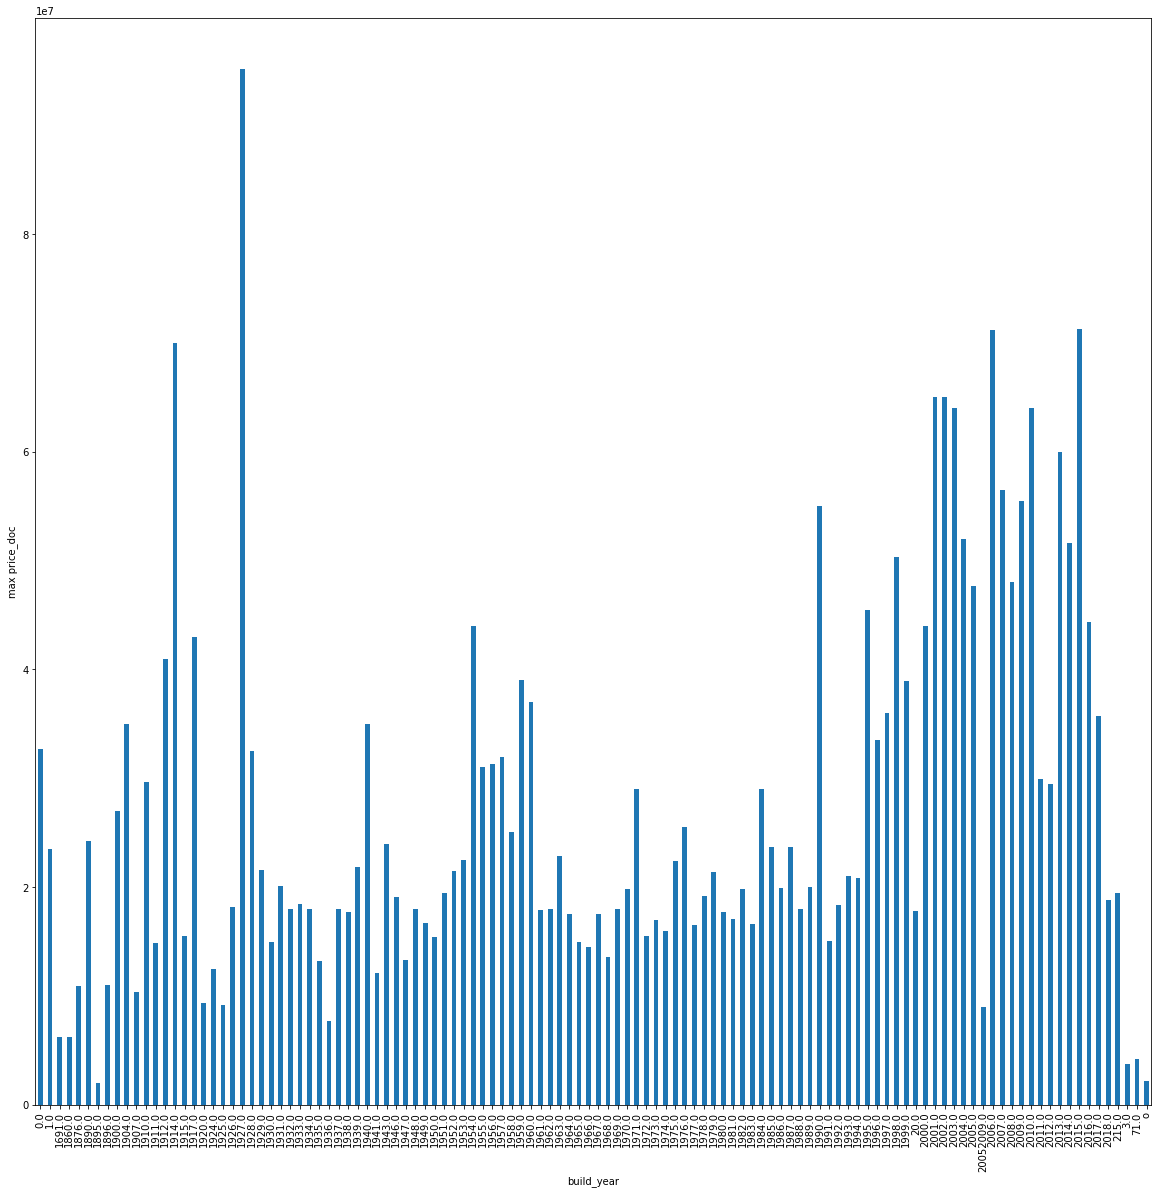

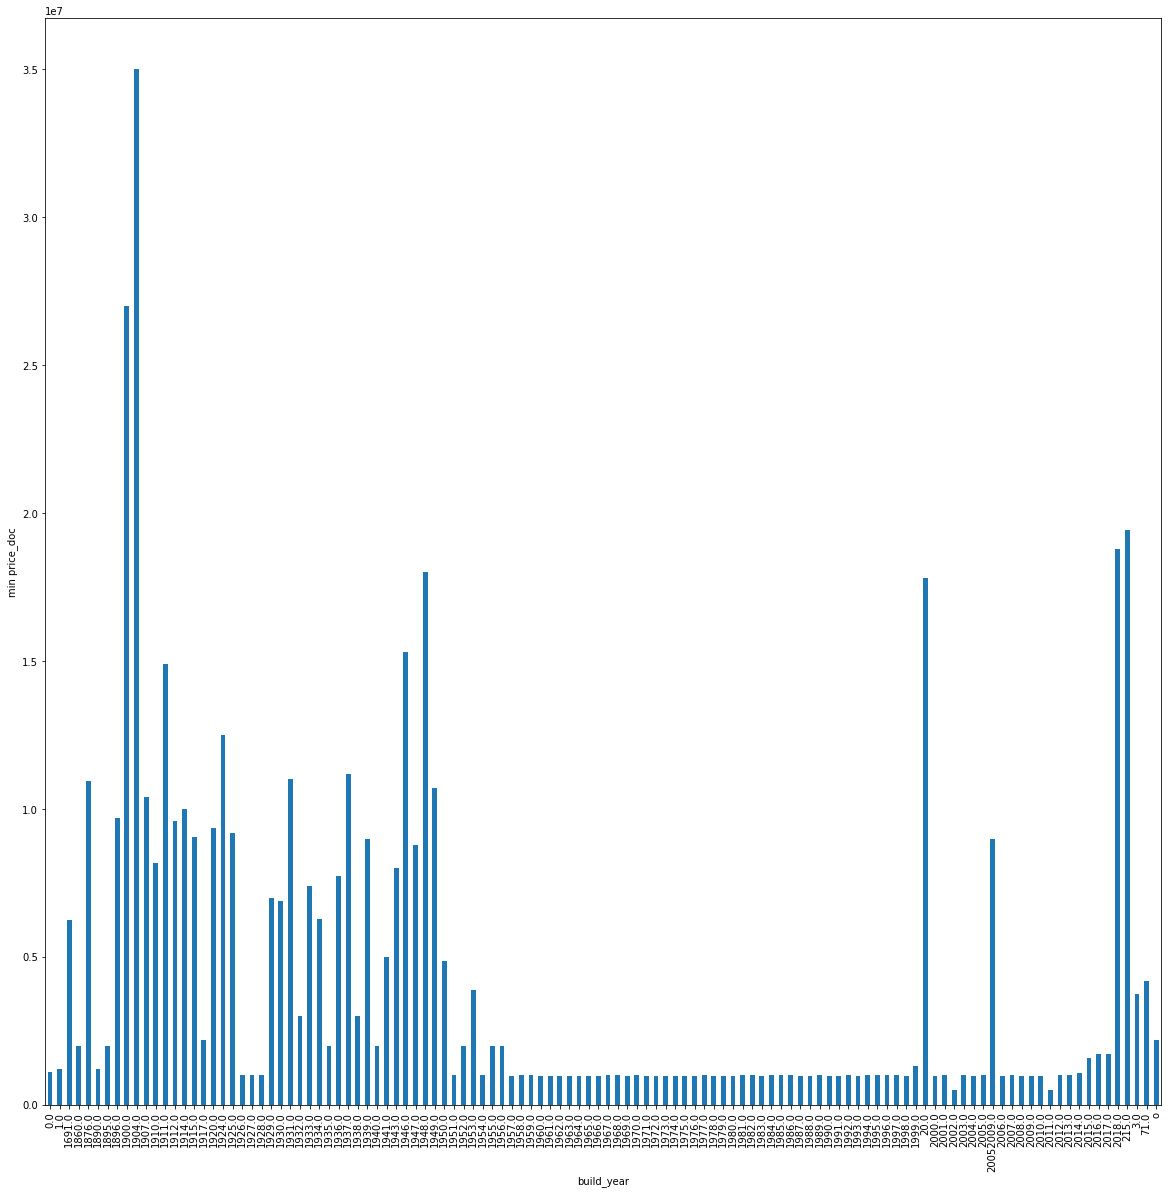

In [18]:
ax = plt.gca()
df.groupby(["build_year"]).agg([np.mean, np.std, np.min, np.max])["price_doc"]["mean"].plot.bar(figsize=(20,20))
ax.set_ylabel('mean price_doc')
plt.show()

ax = plt.gca()
df.groupby(["build_year"]).agg([np.mean, np.std, np.min, np.max])["price_doc"]["amax"].plot.bar(figsize=(20,20))
ax.set_ylabel('max price_doc')
plt.show()

ax = plt.gca()
df.groupby(["build_year"]).agg([np.mean, np.std, np.min, np.max])["price_doc"]["amin"].plot.bar(figsize=(20,20))
ax.set_ylabel('min price_doc')
plt.show()

* Средняя стоимость квартир выше у домов, построенных в 1914 году
* Максимальная стоимость квартир выше у домов, построенных в 1927 году
* Минимальная стоимость квартир выше у домов, построенных в 1904 году

**Анализ взаимного влияния признаков друг на друга.**

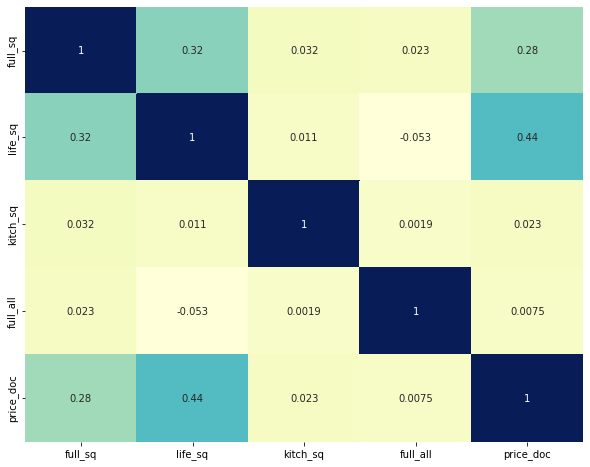

In [19]:
plt.figure(figsize=(10,8))
df_corr = df.drop(columns=['id'])
sns.heatmap(df_corr.corr(), annot=True, cmap="YlGnBu", cbar=False);

Коррелируют: цена квартиры - общая площадь, цена квартиры - жилая площадь, заметим, что площадь кухни с ценой не взаимосвязаны

In [20]:
fig = px.scatter_matrix(df, dimensions=["full_sq", "full_all", "price_doc"], color = "num_room", symbol="num_room")
fig.update_traces(marker=dict(size=2, opacity=1))
fig.update_layout(width=2000,height=2000,)
fig.show()


Если смотреть на карту выше, то видим что дорогие квартиры охотнее покупают в регионах с населением ниже 0.5 млн, причём в основном 3-4 комнатные 

**5 "интересных/неожиданных" наблюдений из набора данных**

* Очень странно, что зависимость цены квартиры от площади кухни очень слабая(возможно она есть на более большом наборе данных, чем текущий)
* Также заметим, что площадь кухни не коррелирует никак с общей и жилой площадью (опять же, возможно, данных мало, или большинство людей устраивает какие-то определенные размеры кухни, а в основном смотрят на комнаты, или строили дома все по каким-то "ГОСТ - кухонные" размерам)
* Большее количество квартир было продана в декабре(мб летом из-за отдыха,  людей не парит приобретения хаты, а зимой на съёмной квартире они понимают, что нужна своя(уют, тепло, домашний очаг))
* Люди продают квартиры охотнее в регионах с населением меньше 0.5 млн
* В марте самый высокий потолок цен квартир